In [ ]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline


In [128]:
# y = mx + b
# w is slope, b is y-intercept

def computeError(w, b, data):
    totalError = 0;
    for i in range(0,len(data)):
        x = data[i, 0]
        y = data[i, 1]
        totalError += (y - (w * x + b)) ** 2
    return float(totalError / len(data))

In [44]:
def stepGradient(cur_w, cur_b, data, learning_rate):
    w_gradient = 0
    b_gradient = 0;
    N = float(len(data))
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        w_gradient += -(2/N) * x * (y - (cur_w * x + cur_b))
        b_gradient += -(2/N) * (y - (cur_w * x + cur_b))
    new_w = cur_w - (learning_rate * w_gradient)
    new_b = cur_b - (learning_rate * b_gradient)
    return [new_w, new_b]
        

In [46]:
def run_GradientDescent(data, starting_w, starting_b, learning_rate, num_iterations):
    w = starting_w
    b = starting_b
    params = []
#     err = []
    for i in range(num_iterations):
        w, b = stepGradient(w, b, data, learning_rate)
        params.append([w,b])
#         err.append([computeError(w,b,data)])
#         print("error = ",err)
#         np.append(ar,[w,b])
#         print("b = {0}, w = {1}".format(b,w))
    return params

In [47]:
def read_data():
    np.random.seed(1)
    x = np.random.rand(100)
    ep = np.random.normal(scale=0.01, size=len(x))
    y = 0.1 + 0.3 * x + ep
    data = np.asarray([x,y]).T
    return data
    

In [129]:
def run():
    data = np.loadtxt("data.csv", delimiter = ',')
#     data = read_data()
    learning_rate = 0.0001
    initial_w = 0;
    initial_b = 0;
    num_iterations = 10000
    print("Starting Gradient Descent with w = {0}, b = {1}, and error = {2}".format(initial_w, initial_b, computeError(initial_w, initial_b, data)))
    print("Running...")
    all_params = np.asarray(run_GradientDescent(data, initial_w, initial_b, learning_rate, num_iterations))
    w = all_params[num_iterations - 1,0]
    b = all_params[num_iterations - 1,1]
#     print(w)
#     [w, b] = run_GradientDescent(data, initial_w, initial_b, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, w = {2}, error = {3}".format(num_iterations, b, w, computeError(w, b, data)))
    return all_params

In [115]:
pr = 0
if __name__ == "__main__":
    pr = run()

Starting Gradient Descent with w = 0, b = 0, and error = 5565.107834483211
Running...
After 10000 iterations b = 0.6078985997054931, w = 1.4675440436333027, error = 112.31533427075733


In [121]:
d = np.loadtxt("data.csv", delimiter = ',')
# d = read_data()

In [122]:
x = d[:,0]
y = d[:,1]

In [126]:
w = pr[:,0]
b = pr[:,1]

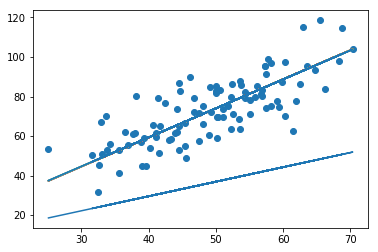

In [127]:
plt.scatter(x,y)
c = 0;
for i,j in zip(w,b):
    if c == 0 or (c + 1) % 1000 == 0:
        plt.plot(x,i*x+j)
    c = c + 1
    